In [85]:
import os
from pylab import rcParams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from numpy import *
from scipy import stats
from pandas.plotting import scatter_matrix
import sklearn
import warnings
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
data = pd.read_excel(r'Attrition Data Exercise.xlsx')

In [4]:
data.DailyRate = data.DailyRate.round(-2)
data.HourlyRate = data.HourlyRate.round(-1)
data.MonthlyIncome = data.MonthlyIncome.round(-3)
data.MonthlyRate = data.MonthlyRate.round(-3)
data.Age = data.Age.round(-1)

In [5]:
Num_val = {'Yes':1, 'No':0}
data['Attrition'] = data["Attrition"].apply(lambda x: Num_val[x])
data['OverTime'] = data["OverTime"].apply(lambda x: Num_val[x])

In [6]:
threshold = 0.0

data = data.drop(data.std()[data.std() == threshold].index.values, axis=1)
data = data.drop('EmployeeNumber', axis = 1)
data = data.drop(['MonthlyIncome','Over18','Educ_bucket', 'EnvironmentSatisfaction_Bucket', 'JobInvolvement_bucket', 'JobSatisfaction_bucket', 'RelationshipSatisfaction_bucket', 'WorkLifeBalance_bucket', 'Company Tenure (yrs)_Bucket'], axis = 1)


In [7]:
data[data.columns[1:]].corr().abs()['Attrition'][:-1]

Attrition                   1.000000
DailyRate                   0.055767
DistanceFromHome            0.077924
Education                   0.031373
EnvironmentSatisfaction     0.103369
HourlyRate                  0.009679
JobInvolvement              0.130016
JobLevel                    0.169105
JobSatisfaction             0.103481
MonthlyRate                 0.015345
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike           0.013478
PerformanceRating           0.002889
RelationshipSatisfaction    0.045872
StockOptionLevel            0.137145
TotalWorkingYears           0.171063
TrainingTimesLastYear       0.059478
WorkLifeBalance             0.063939
Company Tenure (yrs)        0.134392
YearsInCurrentRole          0.160545
YearsSinceLastPromotion     0.033019
Name: Attrition, dtype: float64

In [8]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Company Tenure (yrs),YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Location
0,40,1,Travel_Rarely,1100,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,India
1,50,0,Travel_Frequently,300,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,China
2,40,1,Travel_Rarely,1400,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,India
3,30,0,Travel_Frequently,1400,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,India
4,30,0,Travel_Rarely,600,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,40,0,Travel_Frequently,900,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,USA
1466,40,0,Travel_Rarely,600,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,USA
1467,30,0,Travel_Rarely,200,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,USA
1468,50,0,Travel_Frequently,1000,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,USA


In [9]:
fig, ax=plt.subplots(figsize=(200,200))
plt.title('Correaltion Plot',fontsize=50)
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr().abs(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.xticks(rotation=90, fontsize=100)
plt.yticks(rotation=0, fontsize=100)
plt.show()

In [10]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [11]:
data['X_Age'] = data['Age']

In [12]:
data = data.drop(['Age'], axis = 1)

In [13]:
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Company Tenure (yrs),YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Location,X_Age
0,1,Travel_Rarely,1100,Sales,1,2,Life Sciences,2,Female,90,...,0,8,0,1,6,4,0,5,India,40
1,0,Travel_Frequently,300,Research & Development,8,1,Life Sciences,3,Male,60,...,1,10,3,3,10,7,1,7,China,50
2,1,Travel_Rarely,1400,Research & Development,2,2,Other,4,Male,90,...,0,7,3,3,0,0,0,0,India,40
3,0,Travel_Frequently,1400,Research & Development,3,4,Life Sciences,4,Female,60,...,0,8,3,3,8,7,3,0,India,30
4,0,Travel_Rarely,600,Research & Development,2,1,Medical,1,Male,40,...,1,6,3,3,2,2,2,2,India,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,Travel_Frequently,900,Research & Development,23,2,Medical,3,Male,40,...,1,17,3,3,5,2,0,3,USA,40
1466,0,Travel_Rarely,600,Research & Development,6,1,Medical,4,Male,40,...,1,9,5,3,7,7,1,7,USA,40
1467,0,Travel_Rarely,200,Research & Development,4,3,Life Sciences,2,Male,90,...,1,6,0,3,6,2,0,3,USA,30
1468,0,Travel_Frequently,1000,Sales,2,3,Medical,4,Male,60,...,0,17,3,2,9,6,0,8,USA,50


In [14]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [15]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [16]:
X

array([['Travel_Rarely', 1100, 'Sales', ..., 5, 'India', 40],
       ['Travel_Frequently', 300, 'Research & Development', ..., 7,
        'China', 50],
       ['Travel_Rarely', 1400, 'Research & Development', ..., 0, 'India',
        40],
       ...,
       ['Travel_Rarely', 200, 'Research & Development', ..., 3, 'USA',
        30],
       ['Travel_Frequently', 1000, 'Sales', ..., 8, 'USA', 50],
       ['Travel_Rarely', 600, 'Research & Development', ..., 2, 'USA',
        30]], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 7] = le.fit_transform(X[:, 7])

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
column_trans = make_column_transformer(
(OneHotEncoder(), ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Location']),
(OrdinalEncoder(), ['BusinessTravel']),   
remainder = 'passthrough')

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=
                       [('one_encoder', OneHotEncoder(), [2, 5, 11, 13, 28]),
                       ('ord_encoder', OrdinalEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
X[1]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 300, 8,
       1, 3, 1, 60, 2, 2, 2, 25000, 1, 0, 23, 4, 4, 1, 10, 3, 3, 10, 7, 1,
       7, 50], dtype=object)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
len(X_train)+len(X_test)

1470

In [23]:
len(y_train)+len(y_test)

1470

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

Before Counter({0: 923, 1: 179})


In [26]:
counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 923, 1: 923})


In [27]:
ann = tf.keras.models.Sequential()

In [28]:
ann.add(tf.keras.layers.Dropout(rate=0.3))

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_regularizer='l1', bias_regularizer='l2'))

In [30]:
ann.add(tf.keras.layers.Dropout(rate=0.3))

In [31]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu', kernel_regularizer='l1', bias_regularizer='l2'))

In [32]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08)

In [34]:
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.Recall()])

In [80]:
clff = KerasRegressor(build_fn = ann, verbose = 0, epochs=170)

In [35]:
#Without sampling

In [36]:
ann.fit(X_train, y_train, epochs = 170)

Epoch 1/170
35/35 [==============================] - 0s 755us/step - loss: 1.2856 - accuracy: 0.5027 - recall: 0.5140
Epoch 2/170
35/35 [==============================] - 0s 715us/step - loss: 1.1637 - accuracy: 0.6071 - recall: 0.4358
Epoch 3/170
35/35 [==============================] - 0s 754us/step - loss: 1.0785 - accuracy: 0.6661 - recall: 0.2570
Epoch 4/170
35/35 [==============================] - 0s 746us/step - loss: 1.0005 - accuracy: 0.7223 - recall: 0.0950
Epoch 5/170
35/35 [==============================] - 0s 652us/step - loss: 0.9253 - accuracy: 0.7804 - recall: 0.0726
Epoch 6/170
35/35 [==============================] - 0s 668us/step - loss: 0.8582 - accuracy: 0.8113 - recall: 0.0335
Epoch 7/170
35/35 [==============================] - 0s 657us/step - loss: 0.8018 - accuracy: 0.8285 - recall: 0.0168
Epoch 8/170
35/35 [==============================] - 0s 653us/step - loss: 0.7533 - accuracy: 0.8358 - recall: 0.0000e+00
Epoch 9/170
35/35 [==============================] -

35/35 [==============================] - 0s 763us/step - loss: 0.4357 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 134/170
35/35 [==============================] - 0s 812us/step - loss: 0.4379 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 135/170
35/35 [==============================] - 0s 773us/step - loss: 0.4428 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 136/170
35/35 [==============================] - 0s 758us/step - loss: 0.4377 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 137/170
35/35 [==============================] - 0s 757us/step - loss: 0.4335 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 138/170
35/35 [==============================] - 0s 756us/step - loss: 0.4380 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 139/170
35/35 [==============================] - 0s 762us/step - loss: 0.4331 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 140/170
35/35 [==============================] - 0s 789us/step - loss: 0.4251 - accuracy: 0.8376 - recall: 0.0000e+00
Epoch 141/170
35/35 [=

In [37]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]

In [38]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
accuracy_score(y_test, y_pred)

0.8288043478260869

In [40]:
recall = metrics.recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.690


In [41]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [1]:
#With Smote Sampling

In [42]:
ann.fit(X_train_sm, y_train_sm, epochs = 170)

Epoch 1/170
58/58 [==============================] - 0s 890us/step - loss: 0.7982 - accuracy: 0.5000 - recall: 0.0000e+00
Epoch 2/170
58/58 [==============================] - 0s 864us/step - loss: 0.6984 - accuracy: 0.5000 - recall: 0.0000e+00
Epoch 3/170
58/58 [==============================] - 0s 878us/step - loss: 0.6816 - accuracy: 0.5000 - recall: 0.0000e+00
Epoch 4/170
58/58 [==============================] - 0s 835us/step - loss: 0.6786 - accuracy: 0.5000 - recall: 0.0000e+00
Epoch 5/170
58/58 [==============================] - 0s 834us/step - loss: 0.6673 - accuracy: 0.5000 - recall: 0.0000e+00
Epoch 6/170
58/58 [==============================] - 0s 843us/step - loss: 0.6611 - accuracy: 0.5677 - recall: 0.1983
Epoch 7/170
58/58 [==============================] - 0s 825us/step - loss: 0.6577 - accuracy: 0.7107 - recall: 0.6457
Epoch 8/170
58/58 [==============================] - 0s 821us/step - loss: 0.6579 - accuracy: 0.7086 - recall: 0.6696
Epoch 9/170
58/58 [=================

58/58 [==============================] - 0s 915us/step - loss: 0.6060 - accuracy: 0.7324 - recall: 0.8256
Epoch 138/170
58/58 [==============================] - 0s 934us/step - loss: 0.6088 - accuracy: 0.7270 - recall: 0.8147
Epoch 139/170
58/58 [==============================] - 0s 941us/step - loss: 0.6200 - accuracy: 0.7086 - recall: 0.8028
Epoch 140/170
58/58 [==============================] - 0s 942us/step - loss: 0.6123 - accuracy: 0.7151 - recall: 0.8050
Epoch 141/170
58/58 [==============================] - 0s 926us/step - loss: 0.6125 - accuracy: 0.7189 - recall: 0.7996
Epoch 142/170
58/58 [==============================] - 0s 951us/step - loss: 0.6195 - accuracy: 0.7037 - recall: 0.7909
Epoch 143/170
58/58 [==============================] - 0s 944us/step - loss: 0.6161 - accuracy: 0.7221 - recall: 0.8245
Epoch 144/170
58/58 [==============================] - 0s 953us/step - loss: 0.6173 - accuracy: 0.7194 - recall: 0.8093
Epoch 145/170
58/58 [==============================] -

In [43]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]

In [44]:
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.7418478260869565

In [46]:
recall = metrics.recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.810


In [47]:
confusion_matrix(y_test, y_pred)

array([[226,  84],
       [ 11,  47]])

In [48]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [2]:
#Smote Sampling along with Grid Search Cross Validation

In [69]:
np.count_nonzero(y_train == 1)/np.count_nonzero(y_train == 0)

0.19393282773564463

Epoch 1/170
29/29 - 0s - loss: 0.5322 - accuracy: 0.7831 - recall: 0.6283
Epoch 2/170
29/29 - 0s - loss: 0.5063 - accuracy: 0.7788 - recall: 0.5461
Epoch 3/170
29/29 - 0s - loss: 0.5033 - accuracy: 0.7842 - recall: 0.5197
Epoch 4/170
29/29 - 0s - loss: 0.5041 - accuracy: 0.8007 - recall: 0.5559
Epoch 5/170
29/29 - 0s - loss: 0.4968 - accuracy: 0.7842 - recall: 0.5197
Epoch 6/170
29/29 - 0s - loss: 0.5085 - accuracy: 0.7897 - recall: 0.5493
Epoch 7/170
29/29 - 0s - loss: 0.5226 - accuracy: 0.7875 - recall: 0.5526
Epoch 8/170
29/29 - 0s - loss: 0.5207 - accuracy: 0.7788 - recall: 0.5000
Epoch 9/170
29/29 - 0s - loss: 0.5091 - accuracy: 0.7733 - recall: 0.5066
Epoch 10/170
29/29 - 0s - loss: 0.5237 - accuracy: 0.7755 - recall: 0.5099
Epoch 11/170
29/29 - 0s - loss: 0.5331 - accuracy: 0.7568 - recall: 0.4704
Epoch 12/170
29/29 - 0s - loss: 0.5111 - accuracy: 0.7919 - recall: 0.5757
Epoch 13/170
29/29 - 0s - loss: 0.5039 - accuracy: 0.7842 - recall: 0.5296
Epoch 14/170
29/29 - 0s - loss: 0.

Epoch 111/170
29/29 - 0s - loss: 0.5079 - accuracy: 0.7919 - recall: 0.5362
Epoch 112/170
29/29 - 0s - loss: 0.5165 - accuracy: 0.7689 - recall: 0.5066
Epoch 113/170
29/29 - 0s - loss: 0.5156 - accuracy: 0.7853 - recall: 0.5493
Epoch 114/170
29/29 - 0s - loss: 0.5227 - accuracy: 0.7711 - recall: 0.4868
Epoch 115/170
29/29 - 0s - loss: 0.5134 - accuracy: 0.7733 - recall: 0.4836
Epoch 116/170
29/29 - 0s - loss: 0.4916 - accuracy: 0.7941 - recall: 0.5658
Epoch 117/170
29/29 - 0s - loss: 0.5069 - accuracy: 0.7919 - recall: 0.5493
Epoch 118/170
29/29 - 0s - loss: 0.5168 - accuracy: 0.7777 - recall: 0.5197
Epoch 119/170
29/29 - 0s - loss: 0.5235 - accuracy: 0.7656 - recall: 0.5197
Epoch 120/170
29/29 - 0s - loss: 0.5100 - accuracy: 0.7809 - recall: 0.5000
Epoch 121/170
29/29 - 0s - loss: 0.4963 - accuracy: 0.7864 - recall: 0.5461
Epoch 122/170
29/29 - 0s - loss: 0.5003 - accuracy: 0.7864 - recall: 0.5658
Epoch 123/170
29/29 - 0s - loss: 0.5104 - accuracy: 0.7820 - recall: 0.5099
Epoch 124/17

Epoch 50/170
29/29 - 0s - loss: 0.4949 - accuracy: 0.7867 - recall: 0.5261
Epoch 51/170
29/29 - 0s - loss: 0.4703 - accuracy: 0.8150 - recall: 0.6111
Epoch 52/170
29/29 - 0s - loss: 0.4683 - accuracy: 0.8107 - recall: 0.5686
Epoch 53/170
29/29 - 0s - loss: 0.4809 - accuracy: 0.8020 - recall: 0.5686
Epoch 54/170
29/29 - 0s - loss: 0.4663 - accuracy: 0.8107 - recall: 0.5948
Epoch 55/170
29/29 - 0s - loss: 0.5014 - accuracy: 0.7856 - recall: 0.5817
Epoch 56/170
29/29 - 0s - loss: 0.4900 - accuracy: 0.7900 - recall: 0.5261
Epoch 57/170
29/29 - 0s - loss: 0.4956 - accuracy: 0.7845 - recall: 0.5294
Epoch 58/170
29/29 - 0s - loss: 0.5018 - accuracy: 0.7965 - recall: 0.5654
Epoch 59/170
29/29 - 0s - loss: 0.4814 - accuracy: 0.8030 - recall: 0.5654
Epoch 60/170
29/29 - 0s - loss: 0.4913 - accuracy: 0.7933 - recall: 0.5523
Epoch 61/170
29/29 - 0s - loss: 0.4908 - accuracy: 0.7933 - recall: 0.5392
Epoch 62/170
29/29 - 0s - loss: 0.4710 - accuracy: 0.8150 - recall: 0.5948
Epoch 63/170
29/29 - 0s -

Epoch 159/170
29/29 - 0s - loss: 0.4840 - accuracy: 0.8096 - recall: 0.5654
Epoch 160/170
29/29 - 0s - loss: 0.4690 - accuracy: 0.8248 - recall: 0.6209
Epoch 161/170
29/29 - 0s - loss: 0.4727 - accuracy: 0.8041 - recall: 0.5523
Epoch 162/170
29/29 - 0s - loss: 0.5042 - accuracy: 0.7878 - recall: 0.5196
Epoch 163/170
29/29 - 0s - loss: 0.4723 - accuracy: 0.8009 - recall: 0.5752
Epoch 164/170
29/29 - 0s - loss: 0.4926 - accuracy: 0.8020 - recall: 0.5654
Epoch 165/170
29/29 - 0s - loss: 0.4780 - accuracy: 0.8118 - recall: 0.5588
Epoch 166/170
29/29 - 0s - loss: 0.4741 - accuracy: 0.8030 - recall: 0.5621
Epoch 167/170
29/29 - 0s - loss: 0.4856 - accuracy: 0.7987 - recall: 0.5784
Epoch 168/170
29/29 - 0s - loss: 0.4984 - accuracy: 0.7933 - recall: 0.5261
Epoch 169/170
29/29 - 0s - loss: 0.4951 - accuracy: 0.7824 - recall: 0.5229
Epoch 170/170
29/29 - 0s - loss: 0.4884 - accuracy: 0.7987 - recall: 0.5850
12/12 - 0s
Epoch 1/170
30/30 - 0s - loss: 0.5632 - accuracy: 0.7585 - recall: 0.4519
Epo

30/30 - 0s - loss: 0.5024 - accuracy: 0.7885 - recall: 0.5385
Epoch 99/170
30/30 - 0s - loss: 0.4973 - accuracy: 0.8056 - recall: 0.5641
Epoch 100/170
30/30 - 0s - loss: 0.4790 - accuracy: 0.8141 - recall: 0.5833
Epoch 101/170
30/30 - 0s - loss: 0.5052 - accuracy: 0.7863 - recall: 0.5737
Epoch 102/170
30/30 - 0s - loss: 0.5032 - accuracy: 0.7906 - recall: 0.5737
Epoch 103/170
30/30 - 0s - loss: 0.4986 - accuracy: 0.7981 - recall: 0.5353
Epoch 104/170
30/30 - 0s - loss: 0.4782 - accuracy: 0.8002 - recall: 0.5865
Epoch 105/170
30/30 - 0s - loss: 0.5045 - accuracy: 0.7799 - recall: 0.4776
Epoch 106/170
30/30 - 0s - loss: 0.4894 - accuracy: 0.8034 - recall: 0.5737
Epoch 107/170
30/30 - 0s - loss: 0.4978 - accuracy: 0.7949 - recall: 0.5737
Epoch 108/170
30/30 - 0s - loss: 0.4922 - accuracy: 0.7991 - recall: 0.5481
Epoch 109/170
30/30 - 0s - loss: 0.4947 - accuracy: 0.7981 - recall: 0.5609
Epoch 110/170
30/30 - 0s - loss: 0.5109 - accuracy: 0.7895 - recall: 0.5737
Epoch 111/170
30/30 - 0s - 

Epoch 37/170
31/31 - 0s - loss: 0.5313 - accuracy: 0.7674 - recall: 0.5684
Epoch 38/170
31/31 - 0s - loss: 0.5241 - accuracy: 0.7816 - recall: 0.6053
Epoch 39/170
31/31 - 0s - loss: 0.5198 - accuracy: 0.7674 - recall: 0.6132
Epoch 40/170
31/31 - 0s - loss: 0.5252 - accuracy: 0.7765 - recall: 0.5658
Epoch 41/170
31/31 - 0s - loss: 0.5238 - accuracy: 0.7806 - recall: 0.5974
Epoch 42/170
31/31 - 0s - loss: 0.4975 - accuracy: 0.7978 - recall: 0.6158
Epoch 43/170
31/31 - 0s - loss: 0.5262 - accuracy: 0.7755 - recall: 0.6105
Epoch 44/170
31/31 - 0s - loss: 0.5240 - accuracy: 0.7765 - recall: 0.5895
Epoch 45/170
31/31 - 0s - loss: 0.5226 - accuracy: 0.7735 - recall: 0.6026
Epoch 46/170
31/31 - 0s - loss: 0.5114 - accuracy: 0.7816 - recall: 0.6105
Epoch 47/170
31/31 - 0s - loss: 0.5094 - accuracy: 0.7806 - recall: 0.6053
Epoch 48/170
31/31 - 0s - loss: 0.5232 - accuracy: 0.7887 - recall: 0.6289
Epoch 49/170
31/31 - 0s - loss: 0.5265 - accuracy: 0.7674 - recall: 0.5553
Epoch 50/170
31/31 - 0s -

Epoch 146/170
31/31 - 0s - loss: 0.5344 - accuracy: 0.7634 - recall: 0.6000
Epoch 147/170
31/31 - 0s - loss: 0.5280 - accuracy: 0.7604 - recall: 0.5368
Epoch 148/170
31/31 - 0s - loss: 0.5127 - accuracy: 0.7897 - recall: 0.6342
Epoch 149/170
31/31 - 0s - loss: 0.5200 - accuracy: 0.7755 - recall: 0.6316
Epoch 150/170
31/31 - 0s - loss: 0.5220 - accuracy: 0.7685 - recall: 0.5763
Epoch 151/170
31/31 - 0s - loss: 0.5299 - accuracy: 0.7604 - recall: 0.5526
Epoch 152/170
31/31 - 0s - loss: 0.5097 - accuracy: 0.7917 - recall: 0.6421
Epoch 153/170
31/31 - 0s - loss: 0.5307 - accuracy: 0.7735 - recall: 0.5605
Epoch 154/170
31/31 - 0s - loss: 0.5103 - accuracy: 0.7846 - recall: 0.6579
Epoch 155/170
31/31 - 0s - loss: 0.5150 - accuracy: 0.7664 - recall: 0.6000
Epoch 156/170
31/31 - 0s - loss: 0.5170 - accuracy: 0.7968 - recall: 0.6421
Epoch 157/170
31/31 - 0s - loss: 0.5011 - accuracy: 0.7897 - recall: 0.6211
Epoch 158/170
31/31 - 0s - loss: 0.5322 - accuracy: 0.7897 - recall: 0.6289
Epoch 159/17

Epoch 85/170
32/32 - 0s - loss: 0.5021 - accuracy: 0.7902 - recall: 0.6162
Epoch 86/170
32/32 - 0s - loss: 0.5039 - accuracy: 0.7952 - recall: 0.6397
Epoch 87/170
32/32 - 0s - loss: 0.4866 - accuracy: 0.8002 - recall: 0.6240
Epoch 88/170
32/32 - 0s - loss: 0.5185 - accuracy: 0.7831 - recall: 0.5953
Epoch 89/170
32/32 - 0s - loss: 0.5155 - accuracy: 0.7771 - recall: 0.5849
Epoch 90/170
32/32 - 0s - loss: 0.5166 - accuracy: 0.7801 - recall: 0.6501
Epoch 91/170
32/32 - 0s - loss: 0.5293 - accuracy: 0.7671 - recall: 0.5587
Epoch 92/170
32/32 - 0s - loss: 0.4825 - accuracy: 0.7902 - recall: 0.6371
Epoch 93/170
32/32 - 0s - loss: 0.4867 - accuracy: 0.8012 - recall: 0.6736
Epoch 94/170
32/32 - 0s - loss: 0.4865 - accuracy: 0.8062 - recall: 0.6632
Epoch 95/170
32/32 - 0s - loss: 0.5018 - accuracy: 0.7791 - recall: 0.5901
Epoch 96/170
32/32 - 0s - loss: 0.4924 - accuracy: 0.8092 - recall: 0.6710
Epoch 97/170
32/32 - 0s - loss: 0.5264 - accuracy: 0.7791 - recall: 0.6188
Epoch 98/170
32/32 - 0s -

Epoch 24/170
32/32 - 0s - loss: 0.5222 - accuracy: 0.7742 - recall: 0.6026
Epoch 25/170
32/32 - 0s - loss: 0.5172 - accuracy: 0.7791 - recall: 0.6308
Epoch 26/170
32/32 - 0s - loss: 0.5217 - accuracy: 0.7692 - recall: 0.5897
Epoch 27/170
32/32 - 0s - loss: 0.5217 - accuracy: 0.7673 - recall: 0.5923
Epoch 28/170
32/32 - 0s - loss: 0.5157 - accuracy: 0.7811 - recall: 0.6231
Epoch 29/170
32/32 - 0s - loss: 0.5193 - accuracy: 0.7712 - recall: 0.5897
Epoch 30/170
32/32 - 0s - loss: 0.5196 - accuracy: 0.7682 - recall: 0.5769
Epoch 31/170
32/32 - 0s - loss: 0.5166 - accuracy: 0.7771 - recall: 0.6385
Epoch 32/170
32/32 - 0s - loss: 0.4944 - accuracy: 0.7890 - recall: 0.6256
Epoch 33/170
32/32 - 0s - loss: 0.5071 - accuracy: 0.7742 - recall: 0.6359
Epoch 34/170
32/32 - 0s - loss: 0.5186 - accuracy: 0.7850 - recall: 0.6462
Epoch 35/170
32/32 - 0s - loss: 0.5311 - accuracy: 0.7791 - recall: 0.6077
Epoch 36/170
32/32 - 0s - loss: 0.5291 - accuracy: 0.7821 - recall: 0.6359
Epoch 37/170
32/32 - 0s -

Epoch 133/170
32/32 - 0s - loss: 0.5012 - accuracy: 0.7919 - recall: 0.6462
Epoch 134/170
32/32 - 0s - loss: 0.5198 - accuracy: 0.7653 - recall: 0.5692
Epoch 135/170
32/32 - 0s - loss: 0.5218 - accuracy: 0.7830 - recall: 0.6103
Epoch 136/170
32/32 - 0s - loss: 0.5213 - accuracy: 0.7771 - recall: 0.5872
Epoch 137/170
32/32 - 0s - loss: 0.5269 - accuracy: 0.7633 - recall: 0.5897
Epoch 138/170
32/32 - 0s - loss: 0.5147 - accuracy: 0.7801 - recall: 0.6154
Epoch 139/170
32/32 - 0s - loss: 0.5218 - accuracy: 0.7722 - recall: 0.6000
Epoch 140/170
32/32 - 0s - loss: 0.5048 - accuracy: 0.7801 - recall: 0.5949
Epoch 141/170
32/32 - 0s - loss: 0.5412 - accuracy: 0.7692 - recall: 0.6231
Epoch 142/170
32/32 - 0s - loss: 0.5154 - accuracy: 0.7722 - recall: 0.5846
Epoch 143/170
32/32 - 0s - loss: 0.5022 - accuracy: 0.7870 - recall: 0.6103
Epoch 144/170
32/32 - 0s - loss: 0.5198 - accuracy: 0.7692 - recall: 0.5846
Epoch 145/170
32/32 - 0s - loss: 0.5319 - accuracy: 0.7751 - recall: 0.6077
Epoch 146/17

Epoch 72/170
34/34 - 0s - loss: 0.5569 - accuracy: 0.7474 - recall: 0.6009
Epoch 73/170
34/34 - 0s - loss: 0.5417 - accuracy: 0.7587 - recall: 0.6184
Epoch 74/170
34/34 - 0s - loss: 0.5529 - accuracy: 0.7634 - recall: 0.6075
Epoch 75/170
34/34 - 0s - loss: 0.5610 - accuracy: 0.7399 - recall: 0.6075
Epoch 76/170
34/34 - 0s - loss: 0.5318 - accuracy: 0.7624 - recall: 0.6118
Epoch 77/170
34/34 - 0s - loss: 0.5569 - accuracy: 0.7455 - recall: 0.5746
Epoch 78/170
34/34 - 0s - loss: 0.5403 - accuracy: 0.7671 - recall: 0.6360
Epoch 79/170
34/34 - 0s - loss: 0.5385 - accuracy: 0.7606 - recall: 0.6031
Epoch 80/170
34/34 - 0s - loss: 0.5315 - accuracy: 0.7681 - recall: 0.6294
Epoch 81/170
34/34 - 0s - loss: 0.5396 - accuracy: 0.7615 - recall: 0.6250
Epoch 82/170
34/34 - 0s - loss: 0.5366 - accuracy: 0.7615 - recall: 0.5921
Epoch 83/170
34/34 - 0s - loss: 0.5330 - accuracy: 0.7746 - recall: 0.6535
Epoch 84/170
34/34 - 0s - loss: 0.5399 - accuracy: 0.7662 - recall: 0.6491
Epoch 85/170
34/34 - 0s -

Epoch 11/170
34/34 - 0s - loss: 0.5246 - accuracy: 0.7705 - recall: 0.6275
Epoch 12/170
34/34 - 0s - loss: 0.5253 - accuracy: 0.7733 - recall: 0.6449
Epoch 13/170
34/34 - 0s - loss: 0.5338 - accuracy: 0.7687 - recall: 0.6601
Epoch 14/170
34/34 - 0s - loss: 0.5437 - accuracy: 0.7491 - recall: 0.5969
Epoch 15/170
34/34 - 0s - loss: 0.5187 - accuracy: 0.7789 - recall: 0.6471
Epoch 16/170
34/34 - 0s - loss: 0.5451 - accuracy: 0.7556 - recall: 0.6013
Epoch 17/170
34/34 - 0s - loss: 0.5266 - accuracy: 0.7500 - recall: 0.6209
Epoch 18/170
34/34 - 0s - loss: 0.5471 - accuracy: 0.7687 - recall: 0.6296
Epoch 19/170
34/34 - 0s - loss: 0.5188 - accuracy: 0.7715 - recall: 0.6318
Epoch 20/170
34/34 - 0s - loss: 0.5394 - accuracy: 0.7621 - recall: 0.6187
Epoch 21/170
34/34 - 0s - loss: 0.5513 - accuracy: 0.7547 - recall: 0.6078
Epoch 22/170
34/34 - 0s - loss: 0.5466 - accuracy: 0.7332 - recall: 0.5621
Epoch 23/170
34/34 - 0s - loss: 0.5301 - accuracy: 0.7677 - recall: 0.6383
Epoch 24/170
34/34 - 0s -

Epoch 120/170
34/34 - 0s - loss: 0.5168 - accuracy: 0.7640 - recall: 0.6536
Epoch 121/170
34/34 - 0s - loss: 0.5283 - accuracy: 0.7789 - recall: 0.6253
Epoch 122/170
34/34 - 0s - loss: 0.5126 - accuracy: 0.7892 - recall: 0.6819
Epoch 123/170
34/34 - 0s - loss: 0.5327 - accuracy: 0.7575 - recall: 0.6209
Epoch 124/170
34/34 - 0s - loss: 0.5214 - accuracy: 0.7668 - recall: 0.6536
Epoch 125/170
34/34 - 0s - loss: 0.5227 - accuracy: 0.7491 - recall: 0.5773
Epoch 126/170
34/34 - 0s - loss: 0.5298 - accuracy: 0.7733 - recall: 0.6732
Epoch 127/170
34/34 - 0s - loss: 0.5347 - accuracy: 0.7575 - recall: 0.6296
Epoch 128/170
34/34 - 0s - loss: 0.5361 - accuracy: 0.7593 - recall: 0.6340
Epoch 129/170
34/34 - 0s - loss: 0.5354 - accuracy: 0.7715 - recall: 0.6492
Epoch 130/170
34/34 - 0s - loss: 0.5320 - accuracy: 0.7696 - recall: 0.6536
Epoch 131/170
34/34 - 0s - loss: 0.5186 - accuracy: 0.7575 - recall: 0.6340
Epoch 132/170
34/34 - 0s - loss: 0.5141 - accuracy: 0.7705 - recall: 0.6514
Epoch 133/17

Epoch 59/170
35/35 - 0s - loss: 0.5250 - accuracy: 0.7601 - recall: 0.6645
Epoch 60/170
35/35 - 0s - loss: 0.5259 - accuracy: 0.7729 - recall: 0.6346
Epoch 61/170
35/35 - 0s - loss: 0.5179 - accuracy: 0.7701 - recall: 0.7030
Epoch 62/170
35/35 - 0s - loss: 0.5345 - accuracy: 0.7665 - recall: 0.6816
Epoch 63/170
35/35 - 0s - loss: 0.5098 - accuracy: 0.7784 - recall: 0.6752
Epoch 64/170
35/35 - 0s - loss: 0.5289 - accuracy: 0.7665 - recall: 0.6795
Epoch 65/170
35/35 - 0s - loss: 0.5259 - accuracy: 0.7738 - recall: 0.6560
Epoch 66/170
35/35 - 0s - loss: 0.5226 - accuracy: 0.7701 - recall: 0.6688
Epoch 67/170
35/35 - 0s - loss: 0.5261 - accuracy: 0.7582 - recall: 0.6389
Epoch 68/170
35/35 - 0s - loss: 0.5045 - accuracy: 0.7747 - recall: 0.6603
Epoch 69/170
35/35 - 0s - loss: 0.5128 - accuracy: 0.7958 - recall: 0.7094
Epoch 70/170
35/35 - 0s - loss: 0.5006 - accuracy: 0.7949 - recall: 0.7137
Epoch 71/170
35/35 - 0s - loss: 0.5157 - accuracy: 0.7674 - recall: 0.6197
Epoch 72/170
35/35 - 0s -

Epoch 168/170
35/35 - 0s - loss: 0.5280 - accuracy: 0.7601 - recall: 0.6325
Epoch 169/170
35/35 - 0s - loss: 0.5064 - accuracy: 0.7894 - recall: 0.6731
Epoch 170/170
35/35 - 0s - loss: 0.5057 - accuracy: 0.7985 - recall: 0.7115
12/12 - 0s
Epoch 1/170
36/36 - 0s - loss: 0.6196 - accuracy: 0.7099 - recall: 0.6034
Epoch 2/170
36/36 - 0s - loss: 0.5638 - accuracy: 0.7537 - recall: 0.6485
Epoch 3/170
36/36 - 0s - loss: 0.5687 - accuracy: 0.7344 - recall: 0.6259
Epoch 4/170
36/36 - 0s - loss: 0.5360 - accuracy: 0.7616 - recall: 0.6579
Epoch 5/170
36/36 - 0s - loss: 0.5593 - accuracy: 0.7493 - recall: 0.6410
Epoch 6/170
36/36 - 0s - loss: 0.5436 - accuracy: 0.7572 - recall: 0.6711
Epoch 7/170
36/36 - 0s - loss: 0.5533 - accuracy: 0.7572 - recall: 0.6485
Epoch 8/170
36/36 - 0s - loss: 0.5698 - accuracy: 0.7327 - recall: 0.6429
Epoch 9/170
36/36 - 0s - loss: 0.5348 - accuracy: 0.7756 - recall: 0.6898
Epoch 10/170
36/36 - 0s - loss: 0.5468 - accuracy: 0.7616 - recall: 0.6598
Epoch 11/170
36/36 -

36/36 - 0s - loss: 0.5328 - accuracy: 0.7642 - recall: 0.6786
Epoch 108/170
36/36 - 0s - loss: 0.5456 - accuracy: 0.7590 - recall: 0.6673
Epoch 109/170
36/36 - 0s - loss: 0.5214 - accuracy: 0.7686 - recall: 0.6823
Epoch 110/170
36/36 - 0s - loss: 0.5101 - accuracy: 0.7853 - recall: 0.6917
Epoch 111/170
36/36 - 0s - loss: 0.5425 - accuracy: 0.7564 - recall: 0.6767
Epoch 112/170
36/36 - 0s - loss: 0.5378 - accuracy: 0.7520 - recall: 0.6617
Epoch 113/170
36/36 - 0s - loss: 0.5399 - accuracy: 0.7555 - recall: 0.6579
Epoch 114/170
36/36 - 0s - loss: 0.5291 - accuracy: 0.7660 - recall: 0.6974
Epoch 115/170
36/36 - 0s - loss: 0.5506 - accuracy: 0.7528 - recall: 0.6429
Epoch 116/170
36/36 - 0s - loss: 0.5316 - accuracy: 0.7546 - recall: 0.6541
Epoch 117/170
36/36 - 0s - loss: 0.5502 - accuracy: 0.7502 - recall: 0.6786
Epoch 118/170
36/36 - 0s - loss: 0.5404 - accuracy: 0.7625 - recall: 0.6654
Epoch 119/170
36/36 - 0s - loss: 0.5379 - accuracy: 0.7581 - recall: 0.6880
Epoch 120/170
36/36 - 0s -

Epoch 46/170
36/36 - 0s - loss: 0.4832 - accuracy: 0.8085 - recall: 0.7332
Epoch 47/170
36/36 - 0s - loss: 0.5328 - accuracy: 0.7633 - recall: 0.6866
Epoch 48/170
36/36 - 0s - loss: 0.5231 - accuracy: 0.7807 - recall: 0.7015
Epoch 49/170
36/36 - 0s - loss: 0.5224 - accuracy: 0.7746 - recall: 0.7127
Epoch 50/170
36/36 - 0s - loss: 0.5215 - accuracy: 0.7720 - recall: 0.6866
Epoch 51/170
36/36 - 0s - loss: 0.5212 - accuracy: 0.7824 - recall: 0.7071
Epoch 52/170
36/36 - 0s - loss: 0.5044 - accuracy: 0.7868 - recall: 0.7313
Epoch 53/170
36/36 - 0s - loss: 0.4827 - accuracy: 0.7937 - recall: 0.7220
Epoch 54/170
36/36 - 0s - loss: 0.5137 - accuracy: 0.7737 - recall: 0.7127
Epoch 55/170
36/36 - 0s - loss: 0.5380 - accuracy: 0.7746 - recall: 0.7220
Epoch 56/170
36/36 - 0s - loss: 0.5356 - accuracy: 0.7563 - recall: 0.6866
Epoch 57/170
36/36 - 0s - loss: 0.5363 - accuracy: 0.7720 - recall: 0.7071
Epoch 58/170
36/36 - 0s - loss: 0.5109 - accuracy: 0.7903 - recall: 0.6940
Epoch 59/170
36/36 - 0s -

Epoch 155/170
36/36 - 0s - loss: 0.5240 - accuracy: 0.7607 - recall: 0.6922
Epoch 156/170
36/36 - 0s - loss: 0.5277 - accuracy: 0.7694 - recall: 0.6866
Epoch 157/170
36/36 - 0s - loss: 0.5208 - accuracy: 0.7763 - recall: 0.7108
Epoch 158/170
36/36 - 0s - loss: 0.4925 - accuracy: 0.8050 - recall: 0.7108
Epoch 159/170
36/36 - 0s - loss: 0.5127 - accuracy: 0.7824 - recall: 0.7183
Epoch 160/170
36/36 - 0s - loss: 0.5530 - accuracy: 0.7511 - recall: 0.6698
Epoch 161/170
36/36 - 0s - loss: 0.5267 - accuracy: 0.7755 - recall: 0.6978
Epoch 162/170
36/36 - 0s - loss: 0.5079 - accuracy: 0.7824 - recall: 0.7332
Epoch 163/170
36/36 - 0s - loss: 0.5039 - accuracy: 0.7798 - recall: 0.6978
Epoch 164/170
36/36 - 0s - loss: 0.5238 - accuracy: 0.7694 - recall: 0.7090
Epoch 165/170
36/36 - 0s - loss: 0.5062 - accuracy: 0.7824 - recall: 0.7108
Epoch 166/170
36/36 - 0s - loss: 0.5333 - accuracy: 0.7755 - recall: 0.6940
Epoch 167/170
36/36 - 0s - loss: 0.5109 - accuracy: 0.7885 - recall: 0.7332
Epoch 168/17

Epoch 94/170
37/37 - 0s - loss: 0.5334 - accuracy: 0.7838 - recall: 0.7216
Epoch 95/170
37/37 - 0s - loss: 0.5166 - accuracy: 0.7761 - recall: 0.7253
Epoch 96/170
37/37 - 0s - loss: 0.5292 - accuracy: 0.7821 - recall: 0.7088
Epoch 97/170
37/37 - 0s - loss: 0.5305 - accuracy: 0.7675 - recall: 0.7271
Epoch 98/170
37/37 - 0s - loss: 0.5239 - accuracy: 0.7709 - recall: 0.7106
Epoch 99/170
37/37 - 0s - loss: 0.5265 - accuracy: 0.7547 - recall: 0.7088
Epoch 100/170
37/37 - 0s - loss: 0.5181 - accuracy: 0.7718 - recall: 0.7051
Epoch 101/170
37/37 - 0s - loss: 0.5144 - accuracy: 0.7923 - recall: 0.7527
Epoch 102/170
37/37 - 0s - loss: 0.5146 - accuracy: 0.7795 - recall: 0.7106
Epoch 103/170
37/37 - 0s - loss: 0.5175 - accuracy: 0.7744 - recall: 0.7271
Epoch 104/170
37/37 - 0s - loss: 0.5243 - accuracy: 0.7786 - recall: 0.7216
Epoch 105/170
37/37 - 0s - loss: 0.5234 - accuracy: 0.7761 - recall: 0.7234
Epoch 106/170
37/37 - 0s - loss: 0.5005 - accuracy: 0.7872 - recall: 0.7344
Epoch 107/170
37/3

Epoch 33/170
39/39 - 0s - loss: 0.5362 - accuracy: 0.7635 - recall: 0.7241
Epoch 34/170
39/39 - 0s - loss: 0.5671 - accuracy: 0.7521 - recall: 0.6995
Epoch 35/170
39/39 - 0s - loss: 0.5465 - accuracy: 0.7652 - recall: 0.7455
Epoch 36/170
39/39 - 0s - loss: 0.5535 - accuracy: 0.7529 - recall: 0.7028
Epoch 37/170
39/39 - 0s - loss: 0.5303 - accuracy: 0.7652 - recall: 0.7110
Epoch 38/170
39/39 - 0s - loss: 0.5347 - accuracy: 0.7767 - recall: 0.7422
Epoch 39/170
39/39 - 0s - loss: 0.5552 - accuracy: 0.7463 - recall: 0.7192
Epoch 40/170
39/39 - 0s - loss: 0.5425 - accuracy: 0.7562 - recall: 0.7307
Epoch 41/170
39/39 - 0s - loss: 0.5457 - accuracy: 0.7635 - recall: 0.7094
Epoch 42/170
39/39 - 0s - loss: 0.5366 - accuracy: 0.7750 - recall: 0.7471
Epoch 43/170
39/39 - 0s - loss: 0.5587 - accuracy: 0.7496 - recall: 0.6732
Epoch 44/170
39/39 - 0s - loss: 0.5626 - accuracy: 0.7562 - recall: 0.7126
Epoch 45/170
39/39 - 0s - loss: 0.5437 - accuracy: 0.7734 - recall: 0.7192
Epoch 46/170
39/39 - 0s -

Epoch 142/170
39/39 - 0s - loss: 0.5386 - accuracy: 0.7594 - recall: 0.7176
Epoch 143/170
39/39 - 0s - loss: 0.5461 - accuracy: 0.7677 - recall: 0.7471
Epoch 144/170
39/39 - 0s - loss: 0.5545 - accuracy: 0.7635 - recall: 0.7274
Epoch 145/170
39/39 - 0s - loss: 0.5645 - accuracy: 0.7578 - recall: 0.7094
Epoch 146/170
39/39 - 0s - loss: 0.5461 - accuracy: 0.7726 - recall: 0.7323
Epoch 147/170
39/39 - 0s - loss: 0.5480 - accuracy: 0.7529 - recall: 0.7061
Epoch 148/170
39/39 - 0s - loss: 0.5442 - accuracy: 0.7578 - recall: 0.7011
Epoch 149/170
39/39 - 0s - loss: 0.5524 - accuracy: 0.7463 - recall: 0.7044
Epoch 150/170
39/39 - 0s - loss: 0.5461 - accuracy: 0.7652 - recall: 0.7307
Epoch 151/170
39/39 - 0s - loss: 0.5371 - accuracy: 0.7603 - recall: 0.7159
Epoch 152/170
39/39 - 0s - loss: 0.5228 - accuracy: 0.7718 - recall: 0.7389
Epoch 153/170
39/39 - 0s - loss: 0.5495 - accuracy: 0.7652 - recall: 0.7044
Epoch 154/170
39/39 - 0s - loss: 0.5629 - accuracy: 0.7512 - recall: 0.7241
Epoch 155/17

Epoch 81/170
39/39 - 0s - loss: 0.5054 - accuracy: 0.7936 - recall: 0.7602
Epoch 82/170
39/39 - 0s - loss: 0.5127 - accuracy: 0.7684 - recall: 0.7194
Epoch 83/170
39/39 - 0s - loss: 0.5090 - accuracy: 0.7945 - recall: 0.7716
Epoch 84/170
39/39 - 0s - loss: 0.5245 - accuracy: 0.7732 - recall: 0.7504
Epoch 85/170
39/39 - 0s - loss: 0.5034 - accuracy: 0.7822 - recall: 0.7308
Epoch 86/170
39/39 - 0s - loss: 0.5005 - accuracy: 0.7798 - recall: 0.7162
Epoch 87/170
39/39 - 0s - loss: 0.5074 - accuracy: 0.7879 - recall: 0.7520
Epoch 88/170
39/39 - 0s - loss: 0.5159 - accuracy: 0.7757 - recall: 0.7113
Epoch 89/170
39/39 - 0s - loss: 0.5124 - accuracy: 0.7684 - recall: 0.7129
Epoch 90/170
39/39 - 0s - loss: 0.5183 - accuracy: 0.7830 - recall: 0.7602
Epoch 91/170
39/39 - 0s - loss: 0.5090 - accuracy: 0.7887 - recall: 0.7341
Epoch 92/170
39/39 - 0s - loss: 0.5157 - accuracy: 0.7773 - recall: 0.7406
Epoch 93/170
39/39 - 0s - loss: 0.5167 - accuracy: 0.7724 - recall: 0.7145
Epoch 94/170
39/39 - 0s -

Epoch 20/170
39/39 - 0s - loss: 0.5194 - accuracy: 0.7764 - recall: 0.7468
Epoch 21/170
39/39 - 0s - loss: 0.5257 - accuracy: 0.7772 - recall: 0.7468
Epoch 22/170
39/39 - 0s - loss: 0.5311 - accuracy: 0.7636 - recall: 0.7099
Epoch 23/170
39/39 - 0s - loss: 0.5332 - accuracy: 0.7829 - recall: 0.7580
Epoch 24/170
39/39 - 0s - loss: 0.5409 - accuracy: 0.7724 - recall: 0.7420
Epoch 25/170
39/39 - 0s - loss: 0.5300 - accuracy: 0.7740 - recall: 0.7420
Epoch 26/170
39/39 - 0s - loss: 0.5188 - accuracy: 0.7756 - recall: 0.7596
Epoch 27/170
39/39 - 0s - loss: 0.5266 - accuracy: 0.7812 - recall: 0.7436
Epoch 28/170
39/39 - 0s - loss: 0.5373 - accuracy: 0.7724 - recall: 0.7292
Epoch 29/170
39/39 - 0s - loss: 0.5097 - accuracy: 0.7877 - recall: 0.7756
Epoch 30/170
39/39 - 0s - loss: 0.5216 - accuracy: 0.7716 - recall: 0.7436
Epoch 31/170
39/39 - 0s - loss: 0.5351 - accuracy: 0.7676 - recall: 0.7244
Epoch 32/170
39/39 - 0s - loss: 0.5136 - accuracy: 0.7821 - recall: 0.7404
Epoch 33/170
39/39 - 0s -

Epoch 129/170
39/39 - 0s - loss: 0.5201 - accuracy: 0.7869 - recall: 0.7676
Epoch 130/170
39/39 - 0s - loss: 0.5362 - accuracy: 0.7484 - recall: 0.7244
Epoch 131/170
39/39 - 0s - loss: 0.5108 - accuracy: 0.7724 - recall: 0.7532
Epoch 132/170
39/39 - 0s - loss: 0.5131 - accuracy: 0.7796 - recall: 0.7532
Epoch 133/170
39/39 - 0s - loss: 0.5399 - accuracy: 0.7676 - recall: 0.7340
Epoch 134/170
39/39 - 0s - loss: 0.5241 - accuracy: 0.7764 - recall: 0.7420
Epoch 135/170
39/39 - 0s - loss: 0.5114 - accuracy: 0.7885 - recall: 0.7612
Epoch 136/170
39/39 - 0s - loss: 0.5102 - accuracy: 0.7748 - recall: 0.7516
Epoch 137/170
39/39 - 0s - loss: 0.5461 - accuracy: 0.7588 - recall: 0.7131
Epoch 138/170
39/39 - 0s - loss: 0.5038 - accuracy: 0.7837 - recall: 0.7708
Epoch 139/170
39/39 - 0s - loss: 0.5440 - accuracy: 0.7492 - recall: 0.7292
Epoch 140/170
39/39 - 0s - loss: 0.5230 - accuracy: 0.7780 - recall: 0.7756
Epoch 141/170
39/39 - 0s - loss: 0.5246 - accuracy: 0.7644 - recall: 0.7484
Epoch 142/17

Epoch 68/170
47/47 - 0s - loss: 0.5307 - accuracy: 0.7772 - recall: 0.6094
Epoch 69/170
47/47 - 0s - loss: 0.5220 - accuracy: 0.7799 - recall: 0.5799
Epoch 70/170
47/47 - 0s - loss: 0.5339 - accuracy: 0.7765 - recall: 0.5990
Epoch 71/170
47/47 - 0s - loss: 0.5216 - accuracy: 0.7799 - recall: 0.5833
Epoch 72/170
47/47 - 0s - loss: 0.5260 - accuracy: 0.7678 - recall: 0.5938
Epoch 73/170
47/47 - 0s - loss: 0.5365 - accuracy: 0.7625 - recall: 0.5642
Epoch 74/170
47/47 - 0s - loss: 0.5265 - accuracy: 0.7779 - recall: 0.5885
Epoch 75/170
47/47 - 0s - loss: 0.5400 - accuracy: 0.7518 - recall: 0.5556
Epoch 76/170
47/47 - 0s - loss: 0.5327 - accuracy: 0.7625 - recall: 0.5712
Epoch 77/170
47/47 - 0s - loss: 0.5407 - accuracy: 0.7625 - recall: 0.5382
Epoch 78/170
47/47 - 0s - loss: 0.5085 - accuracy: 0.7879 - recall: 0.6042
Epoch 79/170
47/47 - 0s - loss: 0.5389 - accuracy: 0.7698 - recall: 0.5816
Epoch 80/170
47/47 - 0s - loss: 0.5410 - accuracy: 0.7665 - recall: 0.5660
Epoch 81/170
47/47 - 0s -

<AxesSubplot:xlabel='weight'>

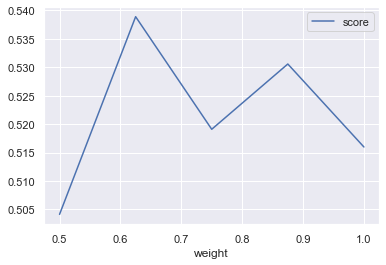

In [90]:
pipe = Pipeline([('smt', SMOTE()), ('knn', KerasClassifier(build_fn = lambda: ann, verbose = 2, epochs=170))])

weights = np.linspace(0.5, 1, 5)

gsc = GridSearchCV(
estimator = pipe,
param_grid = {
    'smt__sampling_strategy' : weights
},
scoring = 'f1',
cv = 3)

grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [91]:
grid_result.cv_results_

{'mean_fit_time': array([3.62097836, 3.71191144, 4.06448332, 4.26546971, 5.14300259]),
 'std_fit_time': array([0.14025181, 0.09142853, 0.04648283, 0.04507853, 0.62310364]),
 'mean_score_time': array([0.032269  , 0.03329698, 0.03331017, 0.03367861, 0.03516078]),
 'std_score_time': array([0.00061231, 0.00202091, 0.00266738, 0.00262463, 0.0020001 ]),
 'param_smt__sampling_strategy': masked_array(data=[0.5, 0.625, 0.75, 0.875, 1.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'smt__sampling_strategy': 0.5},
  {'smt__sampling_strategy': 0.625},
  {'smt__sampling_strategy': 0.75},
  {'smt__sampling_strategy': 0.875},
  {'smt__sampling_strategy': 1.0}],
 'split0_test_score': array([0.52173913, 0.55555556, 0.53763441, 0.54205607, 0.54205607]),
 'split1_test_score': array([0.47826087, 0.47457627, 0.46017699, 0.51388889, 0.47407407]),
 'split2_test_score': array([0.51239669, 0.58646617, 0.55944056, 0.53571429, 0.5317919

In [108]:
pipe = Pipeline([('smt', SMOTE()), ('knn', KerasClassifier(build_fn = lambda: ann, verbose = 2, epochs=170))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

Epoch 1/170
58/58 - 0s - loss: 0.5380 - accuracy: 0.7616 - recall: 0.7194
Epoch 2/170
58/58 - 0s - loss: 0.5354 - accuracy: 0.7622 - recall: 0.7205
Epoch 3/170
58/58 - 0s - loss: 0.5378 - accuracy: 0.7644 - recall: 0.7183
Epoch 4/170
58/58 - 0s - loss: 0.5524 - accuracy: 0.7557 - recall: 0.7118
Epoch 5/170
58/58 - 0s - loss: 0.5484 - accuracy: 0.7627 - recall: 0.7194
Epoch 6/170
58/58 - 0s - loss: 0.5409 - accuracy: 0.7606 - recall: 0.7161
Epoch 7/170
58/58 - 0s - loss: 0.5447 - accuracy: 0.7622 - recall: 0.7021
Epoch 8/170
58/58 - 0s - loss: 0.5345 - accuracy: 0.7703 - recall: 0.7248
Epoch 9/170
58/58 - 0s - loss: 0.5365 - accuracy: 0.7546 - recall: 0.7010
Epoch 10/170
58/58 - 0s - loss: 0.5523 - accuracy: 0.7486 - recall: 0.6945
Epoch 11/170
58/58 - 0s - loss: 0.5374 - accuracy: 0.7524 - recall: 0.7107
Epoch 12/170
58/58 - 0s - loss: 0.5377 - accuracy: 0.7616 - recall: 0.7270
Epoch 13/170
58/58 - 0s - loss: 0.5265 - accuracy: 0.7763 - recall: 0.7270
Epoch 14/170
58/58 - 0s - loss: 0.

Epoch 111/170
58/58 - 0s - loss: 0.5375 - accuracy: 0.7719 - recall: 0.7281
Epoch 112/170
58/58 - 0s - loss: 0.5447 - accuracy: 0.7557 - recall: 0.7216
Epoch 113/170
58/58 - 0s - loss: 0.5196 - accuracy: 0.7752 - recall: 0.7346
Epoch 114/170
58/58 - 0s - loss: 0.5292 - accuracy: 0.7703 - recall: 0.7205
Epoch 115/170
58/58 - 0s - loss: 0.5335 - accuracy: 0.7633 - recall: 0.7248
Epoch 116/170
58/58 - 0s - loss: 0.5407 - accuracy: 0.7644 - recall: 0.7259
Epoch 117/170
58/58 - 0s - loss: 0.5322 - accuracy: 0.7616 - recall: 0.7281
Epoch 118/170
58/58 - 0s - loss: 0.5265 - accuracy: 0.7714 - recall: 0.7194
Epoch 119/170
58/58 - 0s - loss: 0.5391 - accuracy: 0.7589 - recall: 0.7042
Epoch 120/170
58/58 - 0s - loss: 0.5532 - accuracy: 0.7535 - recall: 0.6988
Epoch 121/170
58/58 - 0s - loss: 0.5405 - accuracy: 0.7698 - recall: 0.7172
Epoch 122/170
58/58 - 0s - loss: 0.5328 - accuracy: 0.7790 - recall: 0.7389
Epoch 123/170
58/58 - 0s - loss: 0.5483 - accuracy: 0.7654 - recall: 0.7183
Epoch 124/17

In [109]:
y_pred = (y_pred > 0.2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
accuracy_score(y_test, y_pred)

0.9103260869565217

In [111]:
recall = metrics.recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.936


In [113]:
confusion_matrix(y_test, y_pred)

array([[262,  28],
       [  5,  73]])